In [1]:
import os
import datetime as dt
from datetime import datetime, timedelta
import sqlite3
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def get_date(time):
    time = int(time)
    cdate1 = dt.datetime(1601,1,1)
    cdate2 = dt.timedelta(microseconds=time)
    joined = cdate1+cdate2
    return joined.strftime("%B %d, %Y")

def pull_history():
    filename = '/Users/jasonwang/Library/Application Support/Google/Chrome/Default/fakehistory'
    conn = sqlite3.connect(filename)
    c = conn.cursor()
    URLS_prep = []
    URLS = []
    dates = []
    pattern = r'://.*[\.\:]\w*/|:///.*/'
    
    for info in c.execute('SELECT urls.url, visit_time FROM visits, urls WHERE visits.url=urls.id;'):
        url = re.findall(pattern, info[0])
        URLS_prep.extend(url)
        date = get_date(info[1])
        #date = date[0:10]
        dates.append(date)
        
    for u in URLS_prep:
        u = str(u[3:-1])
        URLS.append(u)
        
    return URLS, dates
    #return len(URLS), len(dates)
#pull_history()

In [3]:
def make_table1():
    URLS, dates = pull_history()
    df=pd.DataFrame(URLS,columns=['URL'])
    df['freq'] = df.groupby('URL')['URL'].transform('count')
    #df['URL'] = df['URL'].astype('category')
    df = df.drop_duplicates()
    df =  df.sort('freq', ascending = False)
    df = df.reset_index(drop=True)
    df = df.head(5)
    #return df['URL'].dtype, df['freq'].dtype
    return df    
#make_table1()

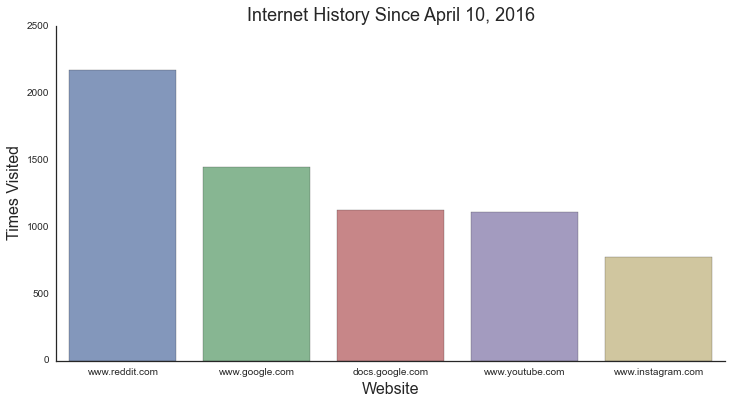

In [4]:
URLS, dates = pull_history()
df = make_table1()
plt.rcParams['figure.figsize']=(12,6)
ax = sns.barplot(x ='URL',y="freq",data=df, alpha = 0.75)
ax.set_xlabel('Website', size = 16)
ax.set_ylabel('Times Visited', size = 16)
ax.set_title("Internet History Since "+min(dates), size = 18)
sns.despine(right=True)

plt.show()

In [5]:
def weeks_ago(weeks):
    past = []
    now = datetime.now()
    
    for n in xrange((weeks*7)-7,weeks*7):
        past_days = now-timedelta(days=n+1)
        past_days = past_days.strftime("%B %d, %Y")
        past.append(past_days)

    return past

In [6]:
def make_table2(weeks):
    URLS, dates = pull_history()
    week = weeks_ago(weeks)
    #week = weeks_ago(1)
    df=pd.DataFrame(URLS,columns=['URL'])
    df['dates'] = dates
    df = df[df.dates.isin(week)]
    df.drop('dates',axis=1, inplace=True)
    df['freq'] = df.groupby('URL')['URL'].transform('count')
    df = df.drop_duplicates()
    df =  df.sort('freq', ascending = False)
    df = df.reset_index(drop=True)
    df = df.head(5)
    return df
#make_table2()

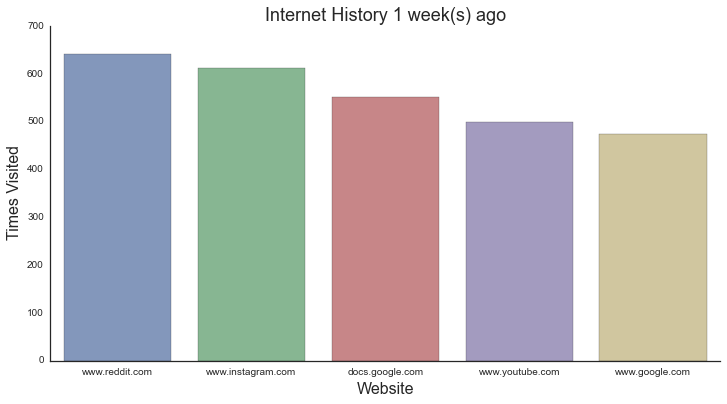

In [7]:
#Choose amount of weeks#
weeks = 1
#~~~~~~~~~~~~~~~~~~~~~~~
df = make_table2(weeks)
plt.rcParams['figure.figsize']=(12,6)
ax = sns.barplot(x ='URL',y="freq",data=df, alpha = 0.75)
ax.set_xlabel('Website', size = 16)
ax.set_ylabel('Times Visited', size = 16)
ax.set_title("Internet History "+str(weeks)+" week(s) ago", size = 18)
sns.despine(right=True)

plt.show()